In [1]:
%matplotlib inline

from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input

from scipy import ndimage
from matplotlib.pyplot import imshow
from PIL import Image
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
import numpy as np

Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

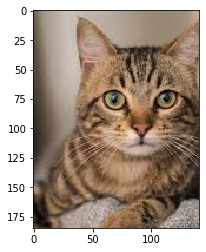

In [25]:
img = Image.open('data/cat_2.jpg')
w, h = img.size
s = min(w, h)
y = (h - s) // 2
x = (w - s) // 2
img = img.crop((x, y, s, s))
imshow(np.asarray(img))

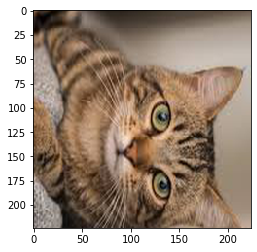

In [26]:
target_size = max(x for x in model.layers[0].input_shape if x)
img = img.resize((target_size, target_size), Image.ANTIALIAS)
imshow(np.asarray(img))

In [27]:
np_img = image.img_to_array(img)
img_batch = np.expand_dims(np_img, axis=0)
pre_processed = preprocess_input(img_batch)
pre_processed.shape

(1, 224, 224, 3)

In [28]:
features = model.predict(pre_processed)
features.shape

(1, 1000)

In [29]:
decode_predictions(features, top=5)

[[('n02123045', 'tabby', 0.40192464),
  ('n02123159', 'tiger_cat', 0.23244362),
  ('n02124075', 'Egyptian_cat', 0.21531148),
  ('n02127052', 'lynx', 0.011979838),
  ('n03942813', 'ping-pong_ball', 0.008352462)]]